In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Mixed-effects models
 
One of the most common ways to model panel data is a **mixed-effects model**, which you can think of as an ordinary least squares model adapted to incorporate dependencies. These models are complex, but in short, they estimate two things:
 
* A regression model for each participant in the dataset
* An overall regression model that fits across all participants and incorporates the individual participants’ models
 
Mixed-effects models separate variance into three groups: 
* variance due to differences between participants
* variance due to differences within participants
* what is left
 
Mixed-effects models have all the strengths (and weaknesses!) of typical linear regression.  They are flexible and interpretable, but constrained by concerns about multicollinearity.  Note that mixed effects models are also called multilevel models, hierarchical linear regression, or fixed and random effects models.  
 
Mixed effects models are mathematically and conceptually complex, with lots of moving parts.  This results in a large number of parameters to estimate- too many for it to be practical (or sometimes, not even possible) to use ordinary-least-squares-type model fitting techniques.    

## Fitting a mixed-effects model: Expectation Maximization

Instead, mixed-effects models are fitted using maximum likelihood methods that are robust to (some degree of) missing data.  The model searches for the parameter values that maximize the likelihood of getting the data we see.  This idea of maximizing likelihood is also called expectation maximization. It is an iterative process where each iteration has two steps. In the first step (called the E step), the algorithm proposes a probability distribution for the parameter values based on the current model. In the second step (the M step), the model parameters are re-estimated on the basis of the new probability distribution.

(Confusing? Basically, we start by proposing some parameter values, then look at how likely the data we have would be given those values. Then we adjust our model based on what we learn, leading to new parameter values. This is the opposite of ordinary least squares regression, where we start with the data and solve for a set of parameter values.)

Iteration continues until the model reaches stopping conditions as defined by hyperparameters. The most common stopping condition is when the change in the logged likelihood of the data between two iterations falls below a certain threshold.

Like other algorithms based on iteration, such as gradient descent, EM solutions may not always converge on gloablly optimal parameter estimates. Varying the starting parameter estimates can help to avoid this problem- if the model converges to similar or identical parameter estimates given different sets of starting parameters, the solution is more likely to be globally optimal.


## The language of mixed-effects models

Mixed-effects models are called 'mixed' because they can contain a combination of two effects: Fixed and random.  **Fixed** effects represent patterns that are true across people or groups.  **Random** effects represent how individual people or groups *deviate* from the fixed effects.  

Regular regression can be thought of as containing only fixed effects.  A combination of fixed and random effects is most common in modeling repeated measures data.  However, if we believe that, on average, that fixed effects will be equal to zero, but that this is because there are between-participant differences that are canceling each other out, we may want to fit a random-effects-only model.  This may occur if, for example, a sample is split equally between two groups with opposing opinions: The strong positive opinions of group 1 could be cancelled out by the strong negative opinions of group 2, leading to an overall conclusion of no effect.  By including random effects, the model better represents what is really going on by explicitly estimating the positive and negative opinions as well as the overall zero effect.

We are going to explore two variants, the random intercepts model and the random slopes model.   Both will also include fixed effects.
 
## Random Intercepts Model
 
We're going to build the random intercepts mixed-effects model from regular regression, the good old $y = \beta_0 + \beta_1x$, based on this data: 

| y | x | id | time |
|----|---|----|------|
| 1 | 1 | 1 | 0 |
| 6 | 2 | 1 | 1 |
| 11 | 3 | 1 | 2 |
| 3 | 1 | 2 | 0 |
| 9 | 2 | 2 | 1 |
| 15 | 3 | 2 | 2 |

Because we need to keep track of which datapoints come from which people, we need to include the participant identifier $i$, and use the time variable $t$ to distinguish between measurement points within a person.  We also include an error term $e$ that represents all the variance in measurement points and people that our model can't otherwise explain.  This gets us this new equation, called the *level 1* equation:

$$y_{ti} = \beta_{0i} + \beta_1x_{ti}+e_{ij}$$

In regular regression, the intercept $\beta_0$ and slope $\beta_1$ are just two numbers to be estimated.  In a random intercepts mixed-effects model, on the other hand, $\beta_{0i}$ is a random, normally distributed variable.  As suggested by the notation, there will be a unique $\beta_0$ for every person $i$.  Those values are calculated using another new equation, the *level 2* equation:

$$\beta_{0i}=\gamma_{00} + \mu_{0i}$$

Here, the coefficient $\gamma_{00}$ (called gamma) represents overall intercept:  Just like in regular regression, the intercept is the mean of all values of y where x =0.  The difference comes from $\mu_{0i}$, which quantifies how much each individual person *deviates* from the overall intercept.  It is normally distributed with a mean of zero, because on average across all persons the intercept is equal to $\gamma_{00}$.

We do not have a level 2 equation for $\beta_1$ because it is not allowed to vary across persons- we know this because it has no $i$ subscript.  

In regular language, our random intercepts model allows different people to have different values for y when x = 0, but the rate of change in y as x increases is the same for everyone.  Level 1 equations are concerned with variables that vary *within* the person or group, while level 2 equations are concerned with variables that vary *between* persons or groups.

Let's visualize this:


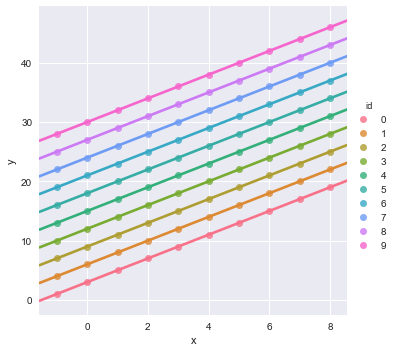

In [18]:
# Creating data for ten participants, with ten datapoints each.
df=pd.DataFrame({"x":list(range(-1,9))*10,
                "y":list(range(1,21,2))*10,
                "id":np.repeat(range(10),10),
                "time":list(range(10))*10})

#Differentiating the data from the different participant ids.
for i in range(10):
    df.loc[df['id']==i,"y"]=df.loc[df['id']==i,"y"]+i*3


# Plotting the data: Same slope, different intercepts.
sns.lmplot(x="x", y="y", hue="id", data=df)
plt.show()

## Random Slopes Model

Now let's switch, and fit a mixed-effects model with random slopes but a shared intercept.  The level 1 equation is:

$$y_{ti} = \beta_{0} + \beta_{1i}x_{ti}+e_{ti}$$

The *level 2* equation is:

$$\beta_{1i}=\gamma_{10} + \mu_{1i}$$

And it looks like this:

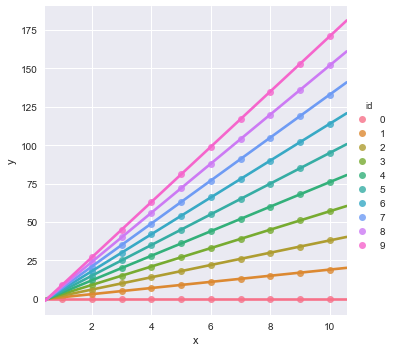

In [21]:
# Creating data for ten participants, with ten datapoints each.
df_slope=pd.DataFrame({"x":list(range(1,11))*10,
                "y":list(range(1,21,2))*10,
                "id":np.repeat(range(10),10),
                "time":list(range(10))*10})

#Differentiating the data from the different participant ids.
for i in range(10):
    df_slope.loc[df_slope['id']==i,"y"]=df_slope.loc[df_slope['id']==i,"y"]*i


# Plotting the data: Same slope, different intercepts.
sns.lmplot(x="x", y="y", hue="id", data=df_slope)
plt.show()

# Drill

What would a model with both random slopes and random intercepts look like?  Write out the equations and set up some simulated data to illustrate your idea.  Discuss your prediction with your mentor to make sure you are clear on these fundamentals before moving on.

## Beyond the Basics: Random effects for features

If more than one feature is included, mixed-effects models can include more than one random slope-- in that situation, the parameters are often called random *effects* rather than random *slopes*, but the function is identical.  With multiple random effects, the effect of each feature on the outcome can be different for different people or groups.  For example, imagine [a longitudinal experiment where people are assigned to do mental training exercises nearly every day for several months](http://link.springer.com/article/10.1007/s12671-016-0594-9), and report on their state of mind each day. Participants try three different kinds of mental training, in random order, and the goal is to find out whether the different training types have different mental effects.

This is a classic mixed-effects modeling problem.  The goal is to detect and model any change in mental state for each person, and to observe one training type leads to a different pattern of change than others.  It would be advisable to include random intercepts, because people start the experiment with different mental states (some happy, some nervous, some preoccupied, etc).  It would also be advisable to include a random slope for time, because people are likely to change at different rates: some may be slower learners than others, for example.

If we include training type as a fixed effect, the model will estimate whether there are overall differences in the rate of change in the three kinds of training.  If we stop here, we are assuming that every person trying training A had an identical response, and that any differences in their scores are due to factors independent of the training itself (like slow learning, or lack of time to practice).  This probably isn't realistic.  Some people will like an assigned training a lot and benefit a lot, and others might dislike one training but potentially do well with others.  By including a random effect for training type, we can see whether different people have different reactions to the same training.  This could be really important if the goal was to recommend mental training as a mental health treatment!

# But wait there's more!

Mixed-effect models are quite versatile and multilayered, and you can do so much with them-- more than we can possibly cover here.  There are logistic mixed effects models for estimating probabilities, and models with more than two levels of nesting (think of people within schools within school districts, for example).  You can include information about time-based dependencies (observations collected closer to one another in time are probably more highly correlated than observations collected further apart).  If you want to learn more, the following book is indispensable:

Raudenbush, S.W., & Bryk, A.S. (2002). Hierarchical Linear Models: Applications and data analysis methods (2nd ed.). Thousand Oaks, CA: Sage Publications, Inc.